# K Means clustering

In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans

#### Cluster the song data based on popularity, dancebility, energy, valence, and tempo column data.

In [4]:
# read data
file = "https://raw.githubusercontent.com/kjdeveloper8/data-exemplar/main/data/songs_normalize.csv"

data = pd.read_csv(file, nrows=50, usecols=["popularity", "danceability", "energy", "valence", "tempo"])
data.head()

,popularity,danceability,energy,valence,tempo
0,77,0.751,0.834,0.894,95.053
1,79,0.434,0.897,0.684,148.726
2,66,0.529,0.496,0.278,136.859
3,78,0.551,0.913,0.544,119.992
4,65,0.614,0.928,0.879,172.656


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    50 non-null     int64  
 1   danceability  50 non-null     float64
 2   energy        50 non-null     float64
 3   valence       50 non-null     float64
 4   tempo         50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [6]:
# statistics of the data
data.describe()

,popularity,danceability,energy,valence,tempo
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,61.620000,0.706280,0.764460,0.664706,120.520660
std,14.011497,0.128206,0.134379,0.206804,25.939127
min,1.000000,0.425000,0.445000,0.078300,72.016000
25%,54.000000,0.630750,0.674750,0.544500,100.095500
50%,62.000000,0.723500,0.761000,0.700000,120.017500
75%,69.000000,0.797750,0.879000,0.814750,135.850000
max,86.000000,0.949000,0.965000,0.960000,201.936000


There is a lot of variation in the magnitude of the data. 'popularity' and 'tempo' has higher magnitude compare to others.

And since K-Means is a distance-based algorithm, it might create a problem.

Therfore we will standardize this data.


In [7]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.798561e-16,-1.014744e-15,-1.643130e-16,4.818368e-16,-2.908784e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-4.370372e+00,-2.216252e+00,-2.401444e+00,-2.864351e+00,-1.888927e+00
25%,-5.493605e-01,-5.951134e-01,-6.743678e-01,-5.871567e-01,-7.954210e-01
50%,2.739593e-02,1.356792e-01,-2.600950e-02,1.723966e-01,-1.959466e-02
75%,5.320578e-01,7.207073e-01,8.610198e-01,7.329030e-01,5.969735e-01
max,1.757665e+00,1.912431e+00,1.507499e+00,1.442389e+00,3.170574e+00


now, it looks somewhat similar ^^

#### Fit the scaled data on K means

In [8]:
# defining the kmeans function with two clusters with k-means++ initialization
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

##### evaluates

In [10]:
# inertia(evaluation matrices) on the fitted data
kmeans.inertia_

186.3013390763141

To determine the optimum number of clusters we will fit multiple k-means models with increased number of clusters in each successive model.

#### Store the inertia value of each model

Text(0, 0.5, 'Inertia')

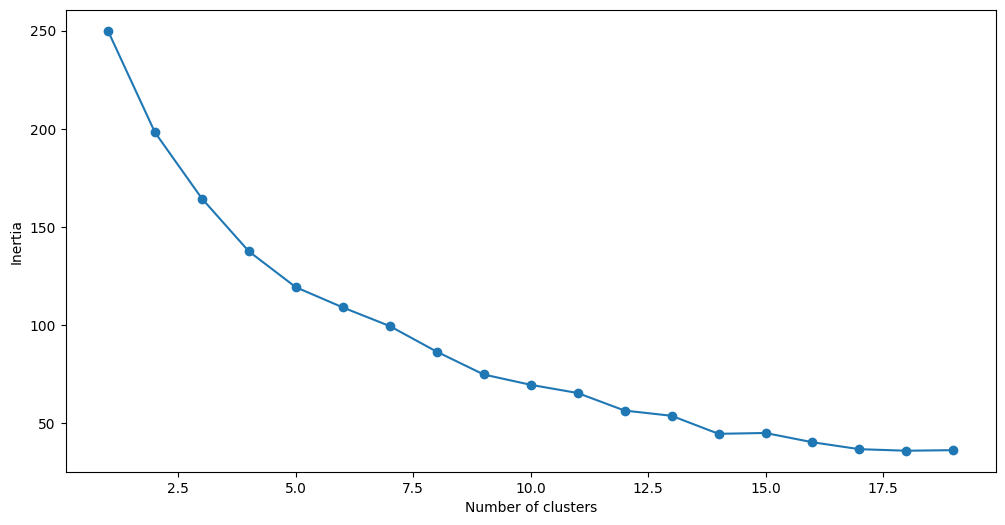

In [11]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

We got an inertia value of around 186. This is the plot we get shows that when we changed the cluster value from 2 to 4, the inertia value reduced sharply. This decrease in the inertia value reduces and eventually becomes constant as we increase the number of clusters further.

So the cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data. (though we also needs to consider computation cost)

Here, we can choose any number of clusters between 5 and 12. 

#### Set the number of clusters and fit the model

In [12]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [13]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
1    20
3    12
0     9
4     5
2     4
Name: count, dtype: int64

So, from above 
- there are 20 data points belonging to cluster 5 (index 1), 
- 12 points in cluster 4 (index 3),
- 9 points in cluster 3 (index 0),
- 5 points in cluster 2 (index 4),
- 4 points in cluster 1 (index 2).

In [14]:
pred

array([1, 4, 0, 4, 2, 1, 1, 1, 1, 1, 3, 1, 2, 0, 0, 3, 1, 1, 1, 1, 4, 1,
       0, 1, 0, 4, 4, 3, 0, 0, 2, 3, 1, 3, 1, 3, 3, 1, 0, 3, 1, 1, 3, 1,
       3, 2, 3, 0, 1, 3], dtype=int32)

#### Visualize

- Plotting Label 0 K-Means Clusters

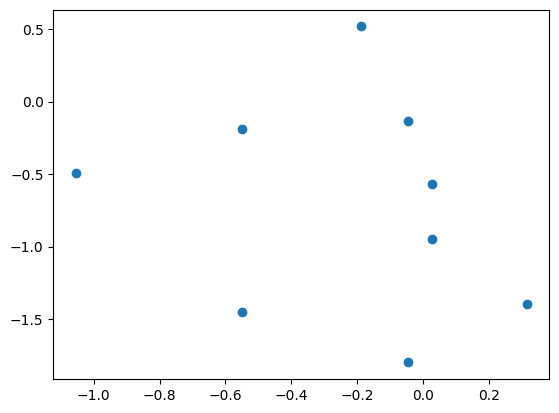

In [15]:
#filter rows of data
filtered_label0 = data_scaled[pred == 0]

plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

As we get, there are 9 points at index 0. (pred == 0)

- Plotting Label 1 and 2 cluster data

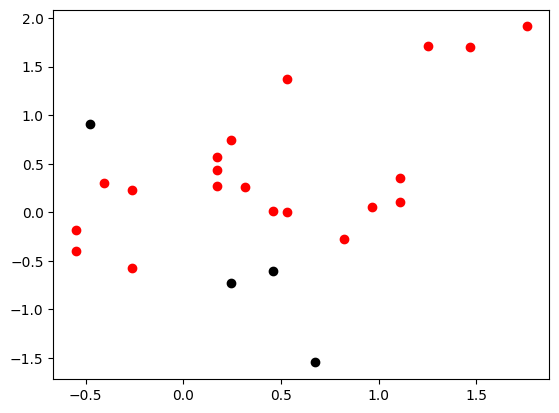

In [16]:
# filter rows of original data
filtered_label1 = data_scaled[pred == 1] # with 20 data points
filtered_label2 = data_scaled[pred == 2] # with 4 data points
 
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black')
plt.show()

- Plot all clusters

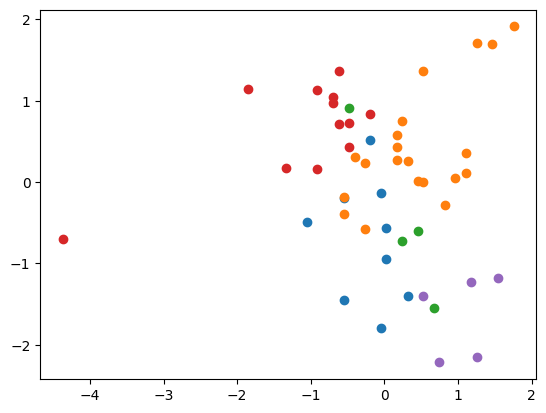

In [23]:
# Get unique preds
u_pred = np.unique(pred)

for i in u_pred:
    filtered = data_scaled[pred == i]
    plt.scatter(filtered[:,0] , filtered[:,1])
plt.show()

- Plotting with centroids

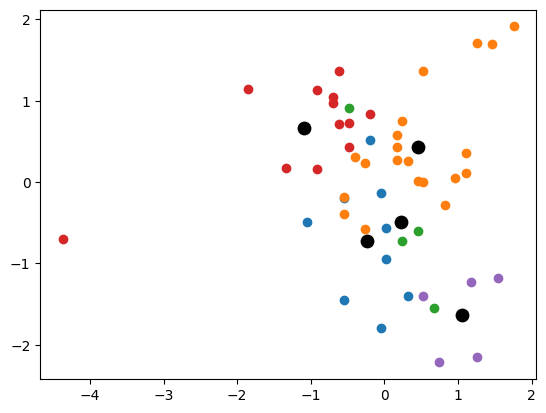

In [25]:
# Get the Centroids
centroids = kmeans.cluster_centers_
 
for i in u_pred:
    filtered = data_scaled[pred == i]
    plt.scatter(filtered[:,0] , filtered[:,1])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.show()